# 2.1　期待値

　本章では，ベイズ学習において用いられる基本的な確率分布の性質を考えるうえで非常に重要な概念である**期待値（expectation）**について説明します．
<br>**期待値**は，各種確率分布の特徴や推定結果を定量的に表すことに用いられます．

## 2.1.1　期待値の定義

　$\mathbf{x}\ $をベクトルとしたときに，確率分布$\ p(\mathbf{x})\ $に対して，ある関数$\ f(\mathbf{x})\ $の期待値$\ \langle f(\mathbf{x})\rangle_{p(\mathbf{x})}\ $は次のように計算されます．

$$\ \langle f(\mathbf{x})\rangle_{p(\mathbf{x})}=\int f(\mathbf{x})p(\mathbf{x})\ d\mathbf{x}$$

## 2.1.3　エントロピー

　確率分布$\ p(\mathbf{x})\ $に対して，次のように定義される期待値を**エントロピー（entropy）**と呼びます．

$$\begin{eqnarray*}
H[p(\mathbf{x})]&=&-\int f(\mathbf{x})\ln{p(\mathbf{x})}\ d\mathbf{x}\\
 &=& -\langle \ln{f(\mathbf{x})}\rangle_{p(\mathbf{x})}
\end{eqnarray*}$$

　それでは$\ p(x=1)=1/3$，$p(x=1)=1/3\ $となるような離散分布のエントロピーを計算してみましょう．今回は，numpyモジュールのlog関数を用いて定義に従って計算する方法とscipy.statsモジュールのentropy関数を用いて直接計算する方法の２通りの方法で計算を行ってみます．

In [1]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt


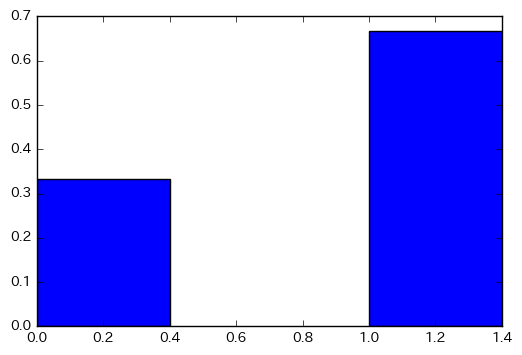

In [2]:
# 離散分布の可視化

plt.bar([0,1],[1/3,2/3], width=0.4)
plt.show()

In [3]:
#scipy.stats.entropyによる実装

entropy([1/3, 2/3])

0.6365141682948128

In [4]:
# 定義による実装

-(1/3 * np.log(1/3) + 2/3 * np.log(2/3))

0.6365141682948128

In [5]:
# 自作メソッド

def H(lst):
    return -sum([x*np.log(x) if x != 0 else 0 for x in lst])
                 
H([1/3, 2/3])

0.6365141682948128

感覚的にはエントロピーは確率分布から生じる予測のしにくさを表しています。

## 2.1.4　KLダイバージェンス

　２つの確率分布$\ p(\mathbf{x})\ $および$\ q(\mathbf{x})\ $に対して，次のように定義される期待値を**KLダイバージェンス（Kullback-Leibler divergence）**と呼びます．

$$\begin{eqnarray*}
KL[q(\mathbf{x})\|p(\mathbf{x})]&=&-\int q(\mathbf{x})\ln{\frac{p(\mathbf{x})}{p(\mathbf{x})}}\ d\mathbf{x}\\
 &=& \langle \ln{q(\mathbf{x})}\rangle_{q(\mathbf{x})}-\langle \ln{p(\mathbf{x})}\rangle_{q(\mathbf{x})}
\end{eqnarray*}$$

## 2.2　サンプリングによる期待値計算

In [6]:
#真の分布
#p(x=1)=1/3, p(x=0)=2/3 となるような離散分布

#データの生成
n = 7
def get_obs(n):
    return (np.random.rand(n) > 2/3) * 1

obs = get_obs(10)
obs

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [7]:
entropy(obs)

0.6931471805599453

In [8]:
entropy([1/3,2/3])

0.6365141682948128

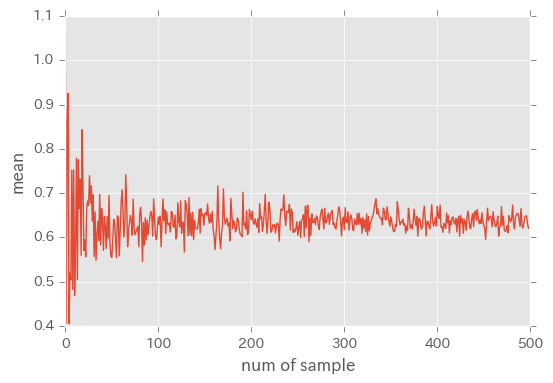

In [9]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

mean = []
for i in range(1, 500):
    lst = get_obs(i)
    num_1 = np.sum(lst)
    num_0 = len(lst)-num_1
    mean.append(-(num_1 * np.log(1/3) + num_0 * np.log(2/3))/ i)

plt.style.use("ggplot")
plt.plot(mean)
plt.xlabel("num of sample")
plt.ylabel("mean")
plt.show()